# Problem Statement
The following data has been collected during a promotion campaign with one of our customers. This customer sells motor oil in bottles to end consumers at gas stations in Germany. Each oil bottle has an individual serial number, contained in a QR (Quick Response) code alongside the ULR for the promotions campaign. Users are motivated to scan the QR code with the outlook of winning prices and discount, thereby transmitting the serial number, timestamp and gps data to our servers. 
Our customer now is facing counterfeit issues - counterfeiters are introducing fake oil bottles into the supply chain, however, typically, the counterfeiters use existing serial numbers multiple times. Our customers are now planning to send detective to track down the counterfeiters' network.  

**Task**

Find the three spots (geopoints) with highest number of suspicious scans around one gas station where activity has been recorded withing the last three month (since Jan 1st, 2021). Use python, pandas and sklearn in a jupyter notebook to solve.  

Solve by 
- finding out which serial numbers relate to suspicious activities by examining the number of scans per serial number.  
- finding hot spots with a lot of suspicious activity by using an appropriate clustering algorithm - use one of: https://scikit-learn.org/0.18/auto_examples/cluster/plot_cluster_comparison.html 
- plotting the gps data can is not required but helps a lot to understand the clustering algorithms. Use matplotlib, or optionally you can use frameworks like bokeh or others to generate an interactive map with the scans as markers.



## Steps to handle:
1. Data Understanding & Problem Statement
2. Data Pre-processing/transformation
3. EDA 
4. Modeling
5. Evaluation & Discussion

# 1. Understand/Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/Shareddrives/Tieu_Quyen/Data_Science/My_Project/Brand Protection'

/content/drive/Shareddrives/Tieu_Quyen/Data_Science/My_Project/Brand Protection


In [ ]:
# Import library 
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import folium    
from   folium.plugins import MarkerCluster
from folium import FeatureGroup
from datetime import date
from datetime import datetime


In [ ]:
# Load & read data 
data = pd.read_csv('BrandOilGermanyData_2019-2021_v2.csv')
data = data.rename(columns={'Unnamed: 0':'date_time'})
data.head()

,date_time,serial_number,gps_latitude,gps_longitude
0,2019-01-01 03:54:50.000000000,2Y4RASY5EC,50.883368,8.543432
1,2019-01-01 09:24:21.000000000,9YP83FNBRT,54.125691,9.418003
2,2019-01-01 11:03:30.000000000,XGHZG1LQQD,50.649414,10.019742
3,2019-01-01 14:55:21.000000000,9DF60WAD51,50.124722,7.005108
4,2019-01-01 16:27:06.000000000,CA1PQYN3B3,51.749523,14.262793


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6210 entries, 0 to 6209
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date_time      6210 non-null   object 
 1   serial_number  6210 non-null   object 
 2   gps_latitude   6210 non-null   float64
 3   gps_longitude  6210 non-null   float64
dtypes: float64(2), object(2)
memory usage: 194.2+ KB


# 2.Date pre-processing/transformation

In [ ]:
# Generate new column of year
data['year'] = pd.DatetimeIndex(data['date_time']).year

# Generate new column of month
data['month'] = pd.DatetimeIndex(data['date_time']).month

# Generate new column of date
data['date'] = pd.DatetimeIndex(data['date_time']).date

# Change Date type
data['date']= pd.to_datetime(data['date'], errors='coerce')

# Generate new column of date
days = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
data['date_of_week']=data['date'].dt.dayofweek.apply(lambda x: days[x])

# Get data for date of week 
data_2021 = data.loc[data['year'] > 2020] 
data_2021.head()

,date_time,serial_number,gps_latitude,gps_longitude,year,month,date,date_of_week
5477,2021-01-01 07:40:55.000000000,NQOQKDH0EH,50.086890,8.768610,2021,1,2021-01-01,Fri
5478,2021-01-01 08:11:46.000000000,123DLIPLNR,50.822579,6.246948,2021,1,2021-01-01,Fri
5479,2021-01-01 09:45:05.000000000,6PRMM2XHP7,50.796159,7.864494,2021,1,2021-01-01,Fri
5480,2021-01-01 12:48:26.771733949,O4QSJMG87H,51.061230,7.554314,2021,1,2021-01-01,Fri
5481,2021-01-01 12:54:45.540743692,6KIJ0NA6YR,51.060475,7.555481,2021,1,2021-01-01,Fri


# 3.EDA

In [ ]:
#Current places in Germany
#  center map on mean of Latitude/Longitude, the result is in Kassel city
map_german = folium.Map(location=[data_2021['gps_latitude'].mean(), data_2021['gps_longitude'].mean()], tiles = 'openstreetmap', zoom_start = 2)

#  add Locations to map
for lat, lng in zip(data_2021['gps_latitude'], data_2021['gps_longitude']):
    folium.CircleMarker([lat, lng],radius=5,fill=True,color='Blue',fill_color='Yellow',fill_opacity=0.6).add_to(map_german)

#  display interactive map
map_german

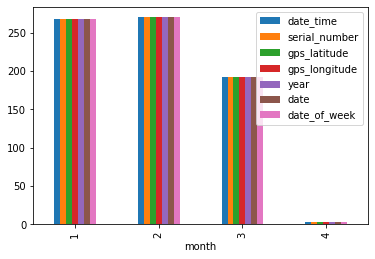

In [ ]:
#Month volume scanning
data_2021.groupby(['month']).count().plot(kind='bar')

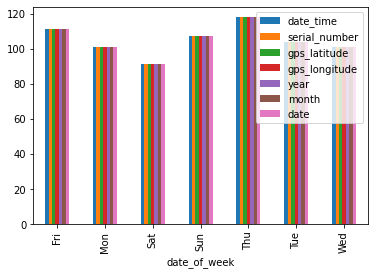

In [ ]:
# date of week scanning
data_2021.groupby(['date_of_week']).count().plot(kind='bar')

In [ ]:
#Top Series 
series_2021 = data_2021.groupby(['serial_number'])['gps_latitude'].count().nlargest(3)
series_2021

serial_number
F1DOFUKD0A    13
YZIM8U9P2P    11
O4QSJMG87H    10
Name: gps_latitude, dtype: int64

In [ ]:
#Data of top series 
top_series=data_2021.groupby('serial_number').filter(lambda x: (x.count()>7).all()).sort_values('serial_number')
top_series.head(10)

,date_time,serial_number,gps_latitude,gps_longitude,year,month,date,date_of_week
5912,2021-02-18 00:37:10.649957340,F1DOFUKD0A,51.763939,8.928543,2021,2,2021-02-18,Thu
5504,2021-01-03 17:10:55.611572364,F1DOFUKD0A,51.613308,12.309333,2021,1,2021-01-03,Sun
5705,2021-01-26 16:42:00.607033446,F1DOFUKD0A,51.762267,8.928530,2021,1,2021-01-26,Tue
5535,2021-01-06 15:28:55.550851901,F1DOFUKD0A,51.061500,7.554904,2021,1,2021-01-06,Wed
5824,2021-02-08 13:41:00.380098731,F1DOFUKD0A,51.763012,8.929053,2021,2,2021-02-08,Mon
5837,2021-02-09 12:57:04.543645603,F1DOFUKD0A,53.630412,10.181024,2021,2,2021-02-09,Tue
5553,2021-01-08 20:30:15.010480840,F1DOFUKD0A,51.613869,12.309083,2021,1,2021-01-08,Fri
5855,2021-02-11 10:57:16.328654440,F1DOFUKD0A,52.616999,13.450018,2021,2,2021-02-11,Thu
5945,2021-02-20 18:38:21.180735662,F1DOFUKD0A,51.763727,8.927925,2021,2,2021-02-20,Sat
5578,2021-01-11 11:18:46.367922466,F1DOFUKD0A,51.762636,8.929202,2021,1,2021-01-11,Mon


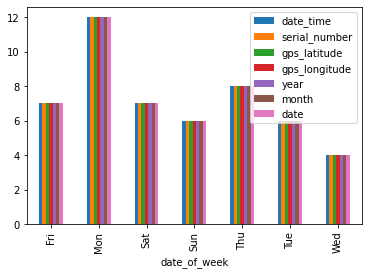

In [ ]:
# Check top date of week because of the German culture to prefer scheduling
top_series.groupby(['date_of_week']).count().plot(kind='bar')


In [ ]:
#Top series with Lat + Long visuliazation
#  center map on mean of Latitude/Longitude
map_top_series = folium.Map(location=[top_series['gps_latitude'].mean(), top_series['gps_longitude'].mean()], tiles = 'openstreetmap', zoom_start = 2)

#  add Locations to map
for lat, lng in zip(top_series['gps_latitude'], top_series['gps_longitude']):
    folium.CircleMarker([lat, lng],radius=5,fill=True,color='Blue',fill_color='Yellow',fill_opacity=0.6).add_to(map_top_series)

#  display interactive map
map_top_series

# 4. Modeling

In [ ]:
# Import library
print(__doc__)
import time
from sklearn.cluster import DBSCAN
from math import radians, cos, sin, asin, sqrt
from scipy.spatial.distance import pdist, squareform

Automatically created module for IPython interactive environment


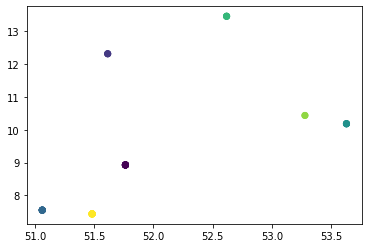

In [ ]:
#Calculate the great circle distance between two points on the earth (specified in decimal degrees)
def haversine(lonlat1, lonlat2):

    # convert decimal degrees to radians 
    lat1, lon1 = lonlat1
    lat2, lon2 = lonlat2
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

long_lat = top_series[['gps_latitude','gps_longitude']]
distance_matrix = squareform(pdist(long_lat, (lambda u,v: haversine(u,v))))

db = DBSCAN(eps=0.2, min_samples=2, metric='precomputed')  # using "precomputed" as recommended by @Anony-Mousse
y_db = db.fit_predict(distance_matrix)

long_lat['cluster'] = y_db

plt.scatter(long_lat['gps_latitude'], long_lat['gps_longitude'], c=long_lat['cluster'])
plt.show()


In [ ]:
y_db

array([0, 1, 0, 2, 0, 3, 1, 4, 0, 0, 0, 2, 5, 3, 6, 2, 0, 0, 6, 1, 2, 6,
       6, 6, 2, 4, 2, 6, 0, 3, 6, 0, 2, 5, 4, 0, 0, 2, 6, 0, 2, 4, 6, 3,
       3, 0, 6, 6, 2, 6])

In [ ]:
#Top 3 series Mean Visul
#  center map on mean of Latitude/Longitude
map_top_series = folium.Map(location=[top_series['gps_latitude'].mean(), top_series['gps_longitude'].mean()], tiles = 'openstreetmap', zoom_start = 2)

#  add Locations to map
for lat, lng, label in zip(long_lat['gps_latitude'], long_lat['gps_longitude'],long_lat['cluster']):
    folium.CircleMarker([lat, lng],radius=5,fill=True,color='Blue',fill_color='Yellow',fill_opacity=0.6).add_to(map_top_series)

#  display interactive map
map_top_series

In [ ]:
#import os
#os.listdir()
#dir(geopy)
# Get Long & Lat of Gas Station
import geopy
from geopy.geocoders import Nominatim

In [ ]:
nom = Nominatim(user_agent='myuseragent')
n=nom.geocode('Stockumer Street')
print(n.latitude,n.longitude)

51.2943506 7.9864093


# 5. Evaluation & Discussion

1. Time range from 1st Jan 2021 to Apr 2021 ? 
2. Do we need modelling to solve the problem ? 
3. Wonder if serial_number would be fake ? Any extra data for daily activities ?
4. Promotion campaign identification ? if we can set up QR scanning with mobile phone number to limit counterfeit issue
5. Data scraping from https://www.mylpg.eu/stations/germany/list/lower-saxony to think of new project supporting brand protection
